In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.utils import shuffle
import matplotlib .pyplot as plt

import cv2
import numpy as np
import pandas as pd
import os

In [2]:
# Load the dataset
data = "C:\\chest_xray\\train"
#classes = os.listdir(data)
classes ={'COVID' :0, 'NORMAL':1}
X = []
y = []
for i, class_name in enumerate(classes):
    class_dir = os.path.join(data, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (64, 64))  # resize the image to a consistent size
        X.append(image)
        y.append(i)
X = np.array(X)
y = np.array(y)

In [3]:

X_1 = X.reshape((7315, 64*64*3))
X_1.shape

(7315, 12288)

In [4]:
# Shuffle and split the dataset into training, validation, and testing sets
X, y = shuffle(X_1, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Train the Random Forest model
rfm = RandomForestClassifier(n_estimators=20, max_depth=5, min_samples_leaf=5, random_state=42)
rfm.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=20,
                       random_state=42)

In [6]:
y_probas_forest = cross_val_predict(rfm, X_train, y_train, cv=3,
                                    method="predict_proba")

In [7]:
y_probas_forest[:2]

array([[0.52832131, 0.47167869],
       [0.50638406, 0.49361594]])

In [48]:
# Evaluate the model on the validation set
y_val_pred = rfm.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_accuracy)

Validation accuracy: 0.4961571306575576


In [49]:
# Test the model on the testing set
y_test_pred = rfm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_accuracy)


Test accuracy: 0.5311004784688995


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')
print("Validation precision:", val_precision)
print("Validation recall:", val_recall)
print("Validation F1 score:", val_f1)

Validation precision: 0.48131109914027337
Validation recall: 0.4961571306575576
Validation F1 score: 0.46371671245594215


In [53]:
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
print("Test precision:", test_precision)
print("Test recall:", test_recall)
print("Test F1 score:", test_f1)

Test precision: 0.5201409044594216
Test recall: 0.5311004784688995
Test F1 score: 0.5049023437033565


In [54]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_test_pred)
precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])

print("Precision:", precision)
#recall = TP / (FN + TP)
#print("Recall:", recall)


Precision: 0.48984771573604063


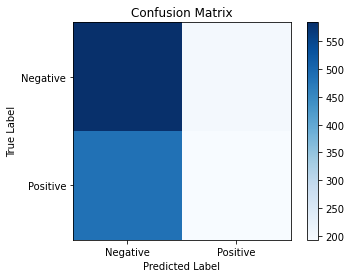

In [55]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=["Negative", "Positive"])
plt.yticks([0, 1], labels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\Users\almei\AppData\Local\Temp/ipykernel_20428/4068207903.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Positive', 'Negative'])
C:\Users\almei\AppData\Local\Temp/ipykernel_20428/4068207903.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Positive', 'Negative'])


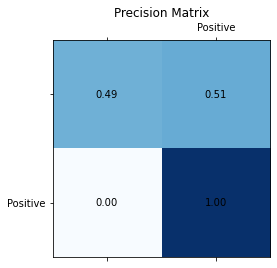

In [56]:
precision_matrix = np.array([[precision, 1-precision], [0, 1]])

# Plot precision matrix
fig, ax = plt.subplots()
ax.matshow(precision_matrix, cmap='Blues')

# Set axis labels
ax.set_xticklabels(['', 'Positive', 'Negative'])
ax.set_yticklabels(['', 'Positive', 'Negative'])

# Set axis ticks
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])

# Add text to matrix
for i in range(2):
    for j in range(2):
        c = precision_matrix[j, i]
        ax.text(i, j, f'{c:.2f}', va='center', ha='center')

# Set title and show plot
ax.set_title('Precision Matrix')
plt.show()

In [57]:
# calculate the true positives for each class
tp = np.diag(cm)

# calculate the number of actual positives for each class
pos = np.sum(cm, axis=1)

# calculate the recall for each class
recall = tp / pos

# print the recall matrix
print(recall)
classes

[0.74394904 0.28466077]


{'COVID': 0, 'NORMAL': 1}

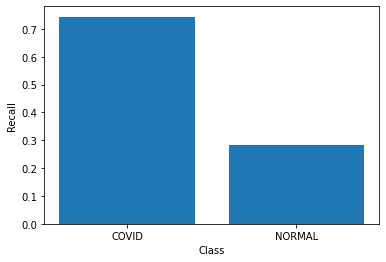

In [58]:
plt.bar(classes.keys(),recall)
plt.xlabel('Class')
plt.ylabel('Recall')
plt.show()

In [59]:

# set a threshold for positive class
threshold = 0.5
# create predictions based on threshold
y_scores_forest = (y_probas_forest[:, 1] >= threshold).astype(int)



In [60]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds  = precision_recall_curve(
    y_train, y_scores_forest)

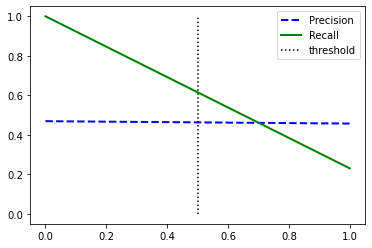

In [61]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.legend()
plt.show()